In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('Data3.csv')
df

,x,z
0,0.1,1.159563
1,0.2,1.002381
2,0.3,0.935920
3,0.4,0.016261
4,0.5,1.172652
...,...,...
95,9.6,2.267108
96,9.7,2.351145
97,9.8,1.957880
98,9.9,1.426106


In [5]:
d = 2

In [6]:
df.insert(0,"x0",1)

In [7]:
df['y'] = df['z']
df =df.drop('z', axis=1)

In [8]:
x1 = df['x']
y1 = df['y']

In [9]:
def Xi_V(index):
    return np.array((df.iloc[index][: d],)).T

In [10]:
def Xi_T_V(index):
    return np.array((df.iloc[index][: d],))

In [11]:
def Yi(index):
    return np.array(df.iloc[index][d:d + 1])

In [12]:
def XiYi_V(index):
    return Xi_V(index) * Yi(index)

In [13]:
zero_vector = np.array([[0.]*d]).T
zero_matrix = zero_vector*zero_vector.T

zero_matrix

array([[0., 0.],
       [0., 0.]])

In [14]:
def Sum_XiYi(df):
    s = zero_vector
    for i in range(len(df)):
        s += Xi_V(i) * Yi(i)[0]

    return s

In [15]:
def Sum_XiXiT(df):
    s = zero_matrix
    for i in range(len(df)):
        s += Xi_V(i) @ Xi_T_V(i)

    return s

In [16]:
matrix = Sum_XiXiT(df)
inverse_matrix = np.linalg.inv(matrix)
inverse_matrix

array([[ 0.04060606, -0.00606061],
       [-0.00606061,  0.00120012]])

In [17]:
w = np.matmul(inverse_matrix, Sum_XiYi(df))
w

array([[1.17706208],
       [0.09419021]])

In [18]:
def predict(X):
    return np.matmul(w.T , X)

In [19]:
def predicts(df):
    lst = []
    for i in range(len(df)):
        lst.append(list(predict(np.array((df.iloc[i][: d],)).T))[0][0])

    return np.array(lst)


In [20]:
predicted_value = np.array(predicts(df))

In [21]:
df['predicted'] = predicted_value

In [22]:
def Rss(df):
    return np.sum((df['y'] - df['predicted'])**2)

In [23]:
def Tss(df):
    return np.sum((df['y'] - np.mean(df['y']))**2)


In [24]:
def R2(df):
    return 1 - Rss(df) / Tss(df)

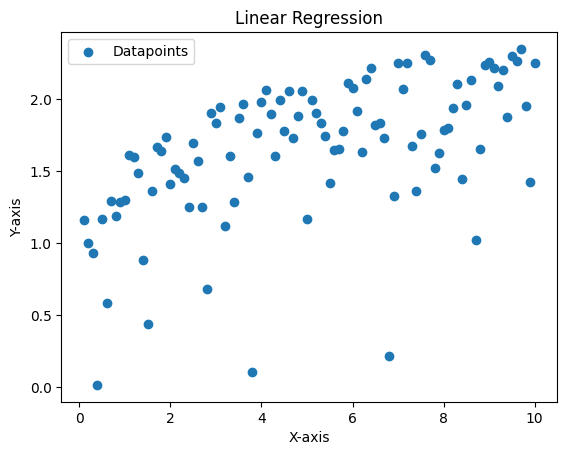

In [32]:
import matplotlib.pyplot as plt
x = x1
y = y1

plt.scatter(x, y, label='Datapoints')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [26]:
LR = LinearRegression()

In [27]:
X =df.drop('y', axis = 1)
X = X.drop('predicted', axis=1)
y = df['y']


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [29]:
x = pd.concat([X_train, X_test], axis=0)
Y = pd.concat([y_train, y_test], axis=0)


In [30]:
LR.fit(X, Y )

LinearRegression()